## Apple Health Processor

-----

## Dependencies and Libraries

In [1]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Steps

In [2]:
steps = pd.read_csv("data/StepCount.csv")

In [3]:
# steps.head()

### Correct time zone to EST and capture time properties

In [4]:
# parse out date and time elements as EST time
steps['startDate'] = pd.to_datetime(steps['startDate'], utc=True).dt.tz_convert('EST')
steps['endDate'] = pd.to_datetime(steps['endDate'], utc=True).dt.tz_convert('EST')
steps['date'] = steps['startDate'].dt.strftime('%Y-%m-%d')
steps['year_month'] = steps['startDate'].dt.strftime('%Y-%m')
steps['year'] = steps['startDate'].dt.year
steps['month'] = steps['startDate'].dt.month
steps['day'] = steps['startDate'].dt.day
steps['hour'] = steps['startDate'].dt.hour
steps['dow'] = steps['startDate'].dt.weekday
steps['doy'] = steps['startDate'].dt.dayofyear

#drop irrelevant columns
steps = steps.drop(['device', 'creationDate'], axis=1)

In [5]:
# steps.head()
# steps.columns

### Use Only Watch Steps, Remove Phone Steps

In [6]:
# drop phone steps ---NEED TO CHANGE THIS TO KEEP PHONE STEPS BEFORE THE WATCH
steps = steps[steps.sourceName == 'Greg’s Apple\xa0Watch']
steps.head()

,sourceName,sourceVersion,type,unit,startDate,endDate,value,date,year_month,year,month,day,hour,dow,doy
6653,Greg’s Apple Watch,4.3,StepCount,count,2018-06-17 15:24:47-05:00,2018-06-17 15:34:45-05:00,119,2018-06-17,2018-06,2018,6,17,15,6,168
6654,Greg’s Apple Watch,4.3,StepCount,count,2018-06-17 15:34:45-05:00,2018-06-17 15:40:49-05:00,110,2018-06-17,2018-06,2018,6,17,15,6,168
6655,Greg’s Apple Watch,4.3,StepCount,count,2018-06-17 15:58:58-05:00,2018-06-17 15:59:59-05:00,67,2018-06-17,2018-06,2018,6,17,15,6,168
6656,Greg’s Apple Watch,4.3,StepCount,count,2018-06-17 15:59:59-05:00,2018-06-17 16:01:01-05:00,111,2018-06-17,2018-06,2018,6,17,15,6,168
6657,Greg’s Apple Watch,4.3,StepCount,count,2018-06-17 16:01:01-05:00,2018-06-17 16:02:02-05:00,83,2018-06-17,2018-06,2018,6,17,16,6,168


### Merge Fitbit data

In [7]:
# # Reade fitbit csv
# fb = read_csv('XXXXXXXXXX.csv')

NameError: name 'read_csv' is not defined

-----

## Rolling Average

In [29]:
steps_by_date = steps.groupby(['date'])['value'].sum().reset_index(name='Steps')
steps_by_date.head()

,date,Steps
0,2018-06-17,10383
1,2018-06-18,12786
2,2018-06-19,16237
3,2018-06-20,18957
4,2018-06-21,15422


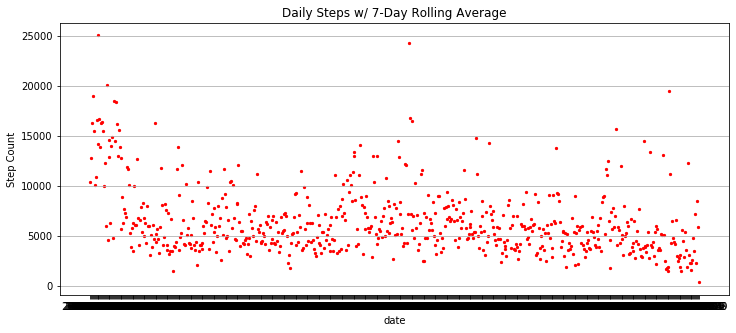

In [54]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=7, center=True).mean()

chart_title = 'Daily Steps w/ 7-Day Rolling Average'

# n_groups = len(dataset)
# index = np.arange(n_groups)

ax = steps_by_date.plot.scatter(x='date', y='Steps', alpha=1, marker='.', color='r', figsize=[12, 5])

# plt.plot(steps_by_date.date, steps_by_date.Steps,'r.',alpha=0.3,ms=4)#, kind='scatter', linewidth=4, alpha=1, marker='.')#, color='#6684c1', 
                      #markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax = dataset.plot(kind='line', figsize=[10, 6], linewidth=4, alpha=1, marker='o', color='#6684c1', 
#                       markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)    
    
# # ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
# ax.xaxis.grid(True)
# # ax.set_ylim(0, 1000)
# ax.set_xticks(index)
ax.set_ylabel('Step Count')
# # ax.set_xlabel('')
# plt.xticks(index, dataset.year_month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [9]:
# # steps_by_date.tail(10)
# steps_by_date.to_csv("data/steps_per_day.csv", index=False)

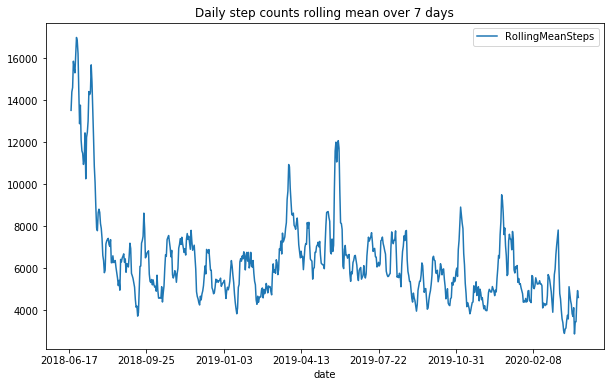

In [10]:
steps_by_date['RollingMeanSteps'] = steps_by_date.Steps.rolling(window=7, center=True).mean()
steps_by_date.plot(x='date', y='RollingMeanSteps', title= 'Daily step counts rolling mean over 7 days', figsize=[10, 6])

## Steps by Day of Week

In [ ]:
# steps_by_date['date'] = pd.to_datetime(steps_by_date['date'])
# steps_by_date['dow'] = steps_by_date['date'].dt.weekday

In [ ]:
# data = steps_by_date.groupby(['dow'])['Steps'].mean()

# fig, ax = plt.subplots(figsize=[10, 6])
# ax = data.plot(kind='bar', x='day_of_week')

# n_groups = len(data)
# index = np.arange(n_groups)
# opacity = 0.75

# #fig, ax = plt.subplots(figsize=[10, 6])
# ax.yaxis.grid(True)

# plt.suptitle('Average Steps by Day of the Week', fontsize=16)
# dow_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
# plt.xticks(index, dow_labels, rotation=45)
# plt.xlabel('Day of Week', fontsize=12, color='red')

------

## Monthly Steps

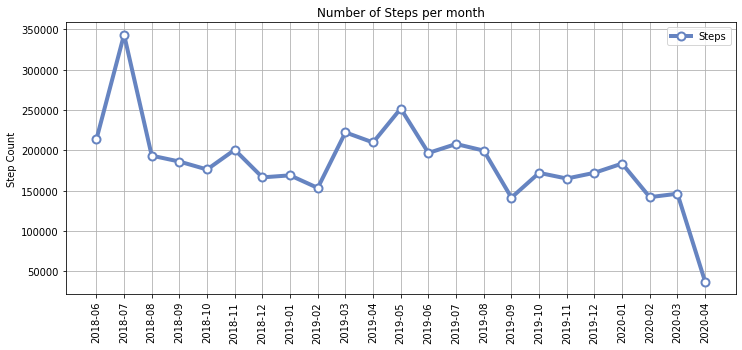

In [24]:
# Group data by month accross years
dataset = steps.groupby(['year_month'])['value'].sum().reset_index(name='Steps')
chart_title = 'Number of Steps per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
# ax.set_xlabel('')
plt.xticks(index, dataset.year_month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [26]:
# total_steps_by_month = steps.groupby(['year','month'])['value'].sum().reset_index(name='Steps')

In [25]:
# total_steps_by_month

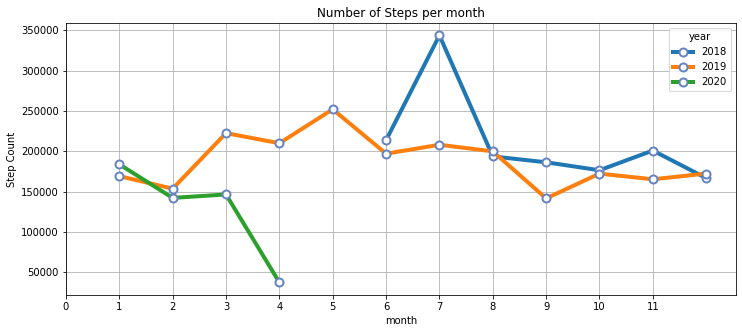

In [22]:
# Group data by year in pivot table
dataset = pd.pivot_table(total_steps_by_month, index='month', columns='year', values='Steps', aggfunc='sum')
chart_title = 'Number of Steps per month'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Step Count')
# ax.set_xlabel('')
# plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

----

## Steps Per Year

In [ ]:
# total_steps_by_years = steps.groupby(['year'])['value'].sum().reset_index(name='Steps')

In [ ]:
# total_steps_by_years

In [ ]:
# dataset = total_steps_by_years

# n_groups = len(dataset)
# opacity = 0.5
# fig, ax = plt.subplots(figsize=[10, 6])
# ax.yaxis.grid(True)
# index = np.arange(n_groups)
# bar_width = 0.4

# data = plt.bar(index, dataset.Steps, bar_width,
#                  alpha=opacity,
#                  color='c',
#                  label='Steps')

# data[-1].set_color('r')

# plt.ylabel('Steps')
# plt.title('Total Steps Per Year')
# plt.xticks(index, dataset.year, rotation=45)
# plt.legend()

# plt.tight_layout()
# plt.show()

-----

## Steps by Hour of Day

In [ ]:
# hour_steps = steps.groupby(['hour'])['value'].sum().reset_index(name='Steps')

In [ ]:
# hour_steps

In [ ]:
# ax = hour_steps.Steps.plot(kind='line', figsize=[10, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
#                       markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# xlabels = hour_steps.index.map(lambda x: '{:02}:00'.format(x))
# ax.set_xticks(range(len(xlabels)))
# ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

# # ax.set_xlim((hour_steps.index[0], hour_steps.index[-1]))

# ax.yaxis.grid(True)
# # ax.set_ylim((0, 1300))
# ax.set_ylabel('Steps')
# ax.set_xlabel('')
# ax.set_title('Steps by hour the day')

# plt.show()

-----

## Weight Data

In [ ]:
weight = pd.read_csv("data/BodyMass.csv")

In [ ]:
# weight.columns

In [ ]:
# parse out date and time elements as EST time
weight['startDate'] = pd.to_datetime(weight['startDate'], utc=True).dt.tz_convert('EST')
weight['endDate'] = pd.to_datetime(weight['endDate'], utc=True).dt.tz_convert('EST')
weight['year'] = weight['startDate'].dt.year
weight['month'] = weight['startDate'].dt.strftime('%Y-%m')
weight['date'] = weight['startDate'].dt.strftime('%Y-%m-%d')
weight['day'] = weight['startDate'].dt.day
weight['hour'] = weight['startDate'].dt.hour
weight['dow'] = weight['startDate'].dt.weekday

weight.drop(['device', 'creationDate'], axis=1)

In [ ]:
weight.tail()

In [ ]:
month_weight = weight.groupby(['month'])['value'].mean().reset_index(name='Weight')

In [ ]:
month_weight

In [ ]:
# a bit of a hackish solution, could use improvement
dataset = month_weight
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_ylabel('Weight (lbs)')
plt.xticks(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()

In [ ]:
# # convert to kg
# month_weight['kg'] = round(month_weight['Weight'] / 2.205, 2)

In [ ]:
# month_weight.columns

In [ ]:
# # a bit of a hackish solution, could use improvement
# dataset = month_weight[['month', 'kg']]
# chart_title = 'Monthly Weight'

# n_groups = len(dataset)
# index = np.arange(n_groups)

# ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
#                       markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# # ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

# ax.yaxis.grid(True)
# ax.xaxis.grid(True)
# # ax.set_ylim(0, 1000)
# ax.set_xticks(index)
# ax.set_ylabel('Weight (kg)')
# plt.xticks(index, dataset.month, rotation=90)
# ax.set_title(chart_title)

# plt.show()

## Heart Rate

In [ ]:
resting = pd.read_csv("data/RestingHeartRate.csv")
len(resting)

In [ ]:
resting.columns

In [ ]:
resting.sourceName.unique()

In [ ]:
# # parse out date and time elements as EST time
# resting['startDate'] = pd.to_datetime(resting['startDate'])
# resting['year'] = resting['startDate'].map(get_year)
# resting['month'] = resting['startDate'].map(get_month)
# resting['date'] = resting['startDate'].map(get_date)

# parse out date and time elements as EST time
resting['startDate'] = pd.to_datetime(resting['startDate'], utc=True).dt.tz_convert('EST')
resting['endDate'] = pd.to_datetime(resting['endDate'], utc=True).dt.tz_convert('EST')
resting['year'] = resting['startDate'].dt.year
resting['month'] = resting['startDate'].dt.strftime('%Y-%m')
resting['date'] = resting['startDate'].dt.strftime('%Y-%m-%d')
resting['day'] = resting['startDate'].dt.day
resting['hour'] = resting['startDate'].dt.hour
resting['dow'] = resting['startDate'].dt.weekday

resting.drop(['device', 'creationDate'], axis=1)

In [ ]:
# resting.tail(10)

In [ ]:
resting[resting.month == '2019-08'].plot(x='date', y='value', title= 'Resting HR', figsize=[10, 6])

In [ ]:
hr = pd.read_csv("data/HeartRate.csv")
len(hr)

In [ ]:
# hr.tail(10)

In [ ]:
# # parse out date and time elements as EST time
# hr['startDate'] = pd.to_datetime(hr['startDate'])
# hr['year'] = hr['startDate'].map(get_year)
# hr['month'] = hr['startDate'].map(get_month)
# hr['hour'] = hr['startDate'].map(get_hour)
# hr['date'] = hr['startDate'].map(get_date)


# parse out date and time elements as EST time
hr['startDate'] = pd.to_datetime(hr['startDate'], utc=True).dt.tz_convert('EST')
hr['endDate'] = pd.to_datetime(hr['endDate'], utc=True).dt.tz_convert('EST')
hr['year'] = hr['startDate'].dt.year
hr['month'] = hr['startDate'].dt.strftime('%Y-%m')
hr['date'] = hr['startDate'].dt.strftime('%Y-%m-%d')
hr['day'] = hr['startDate'].dt.day
hr['hour'] = hr['startDate'].dt.hour
hr['dow'] = hr['startDate'].dt.weekday

hr.drop(['device', 'creationDate'], axis=1)

In [ ]:
# plot a single day
test_date = '2019-08-28'
# len(hr[hr.date == test_date])
# TODO: Fix Axis for Hour of Day or Something Similar
hr[hr.date == test_date].plot(x='startDate', y='value', title= 'HR', figsize=[10, 6])

------